#Phase 1:
Done by:
*   Omnia Khattab 201700036
*   Beshoy Malak 201800613
*   Ahmed Yasser 201700619






#Dataset:
The dataset used can be found in the following link https://archive.ics.uci.edu/ml/datasets/clickstream+data+for+online+shopping#


This data express the "***clickstream data for online shopping***":  The dataset contains information on clickstream from online store offering clothing for pregnant women.
###Data Description:

A full training dataset with the ***following attributes:***
Variables is found in the ***e-shop clothing 2008 data description.txt***




##Import Libraries:


In [66]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn.metrics import accuracy_score, plot_confusion_matrix

##Import Data:

In [67]:
data = pd.read_csv("e-shop clothing 2008.csv", header=0)
newdf = pd.read_csv("e-shop clothing 2008.csv", header=0)
data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [68]:
data.shape

(165474, 14)

In [69]:
data

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


##Data Exploration:

In [70]:
data.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [71]:
data.isna().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

In [72]:
#check
data.duplicated().sum()

0

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

####Features:

1. YEAR (2008)

2. MONTH -> from April (4) to August (8)

3. DAY -> day number of the month

4. ORDER -> sequence of clicks during one session

5. COUNTRY -> variable indicating the country of origin of the IP address with the 
following categories:

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (*.biz)
44-com (*.com)
45-int (*.int)
46-net (*.net)
47-org (*.org)

6. SESSION ID -> variable indicating session id (short record)

7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
1-trousers
2-skirts
3-blouses
4-sale

8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product 
(217 products)

9. COLOUR -> colour of product

1-beige
2-black
3-blue
4-brown
5-burgundy
6-gray
7-green
8-navy blue
9-of many colors
10-olive
11-pink
12-red
13-violet
14-white

10. LOCATION -> photo location on the page, the screen has been divided into six parts:

1-top left
2-top in the middle
3-top right
4-bottom left
5-bottom in the middle
6-bottom right


11. MODEL PHOTOGRAPHY -> variable with two categories: 

1-en face
2-profile

12. PRICE -> price in US dollars

13. PRICE 2 -> variable informing whether the price of a particular product is higher than 
the average price for the entire product category

1-yes
2-no

14. PAGE -> page number within the e-store website (from 1 to 5)

###Target:
Looking at the features above we find that our label/ tareget is price 2 column which is a variable informing whether the price of a particular product is higher than 
the average price for the entire product category

1-yes
2-no

##Data Visuailzation and preproccessing:

####Is the data balance?

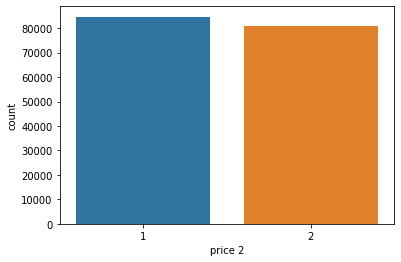

In [74]:
sns.countplot(x='price 2',data=data)

In [75]:
cor_mat=data.corr()["price 2"]
cor_mat.sort_values(inplace = False)

price                    -0.743633
page 1 (main category)   -0.137944
colour                   -0.080147
country                  -0.017536
month                    -0.014658
session ID               -0.012742
order                     0.000772
day                       0.004254
page                      0.029984
model photography         0.072944
location                  0.073187
price 2                   1.000000
year                           NaN
Name: price 2, dtype: float64

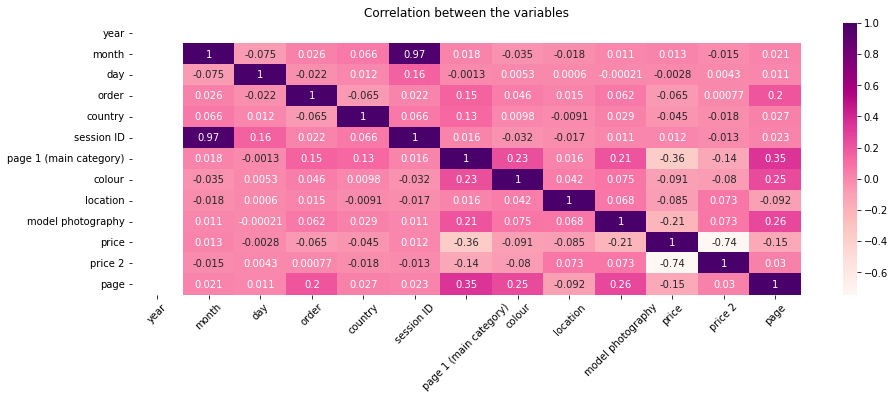

In [76]:
fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
sns.heatmap(data.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

We can find that the most collerated features are (page 1 (main category) , model photography, location) 

###Relationship between price 2 and model photography:

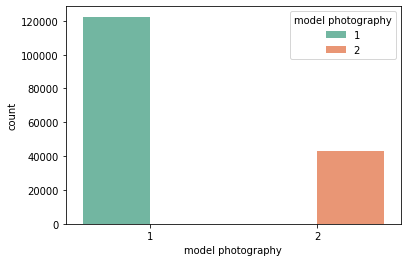

In [77]:
#model=('Enface' , 'profile')
sns.countplot(x='model photography',hue='model photography',data=data, palette='Set2')
plt.show()
#1: en face  2: profile


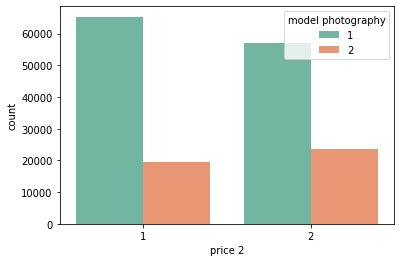

In [78]:
sns.countplot(x='price 2', hue='model photography', data=data, palette='Set2')

###Relationship between price 2 and page main category:

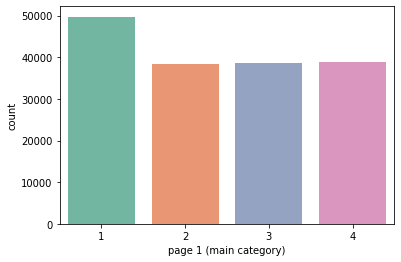

In [79]:
sns.countplot(x='page 1 (main category)',data=data, palette='Set2')
plt.show()
#1-trousers 2-skirt 3-blouse 4-sale

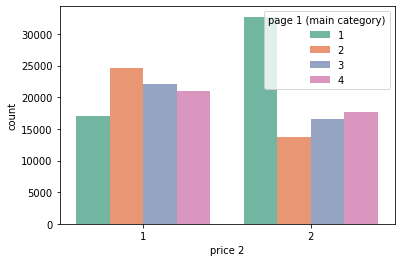

In [80]:
sns.countplot(x='price 2', hue='page 1 (main category)', data=data, palette='Set2')

###Relationship between price 2 and Location (photo location on the page):

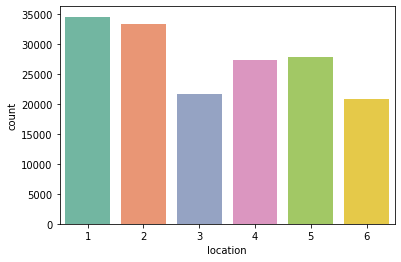

In [81]:
sns.countplot(x='location',data=data, palette='Set2')
plt.show()
#1-top left 2-top in the middle 3-top right 4-bottom left 5-bottom in the middle 6-bottom right

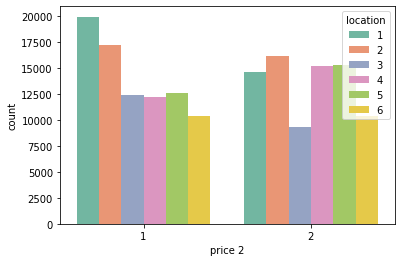

In [82]:
sns.countplot(x='price 2', hue='location', data=data, palette='Set2')

##Spliting the data:

In [83]:
#We will drop the column of page 2 clothing model since there are 217 and it will be hard to find a relation between all of them and our target
data.drop('page 2 (clothing model)',axis=1,inplace=True)
data

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,12,1,1,43,1,1


In [84]:
data.shape

(165474, 13)

In [85]:
X = data.drop('price 2',axis=1)
y = data['price 2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle=True)

In [86]:
print(X_train.shape,y_test.shape)

(132379, 12) (33095,)


# **KNN Model** 


In [87]:
K_list = []
acc_list = []
for K in range(1,30): 
    knn= KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train,y_train)
    y_predict=knn.predict(X_test)
    acc=np.round(accuracy_score(y_test,y_predict)*100,2)
    K_list.append(K)
    acc_list.append(acc)
np.unique(acc_list)


array([88.25, 88.26, 88.28, 88.35, 88.44, 88.52, 88.55, 88.68, 88.75,
       88.78, 88.84, 89.01, 89.03, 89.28, 89.33, 89.46, 89.48, 89.7 ,
       89.73, 90.14, 90.23, 90.27, 90.28, 90.29, 90.48, 90.63, 90.95,
       91.44, 92.46])

**We can observe that accuracy of 92.46 is the highest accuracy obtained**

In [88]:
#KNN
Knn= KNeighborsClassifier()
scores = cross_val_score(Knn, X_train, y_train, cv=5)
print('Average Score for KNN = {}'.format(np.round(scores.mean()*100,2)))

Average Score for KNN = 90.14


In [89]:
#LOO
XLOO = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(XLOO):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [90]:
#Grid Search CV
K_range = list(range(1, 10)) #K neighbors to try

#grid parameters to try
param_grid = {'n_neighbors': K_range,
             'p': [1,2]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True) #we can do this LOO but I didn't due to run-time
grid_search=grid.fit(X_train, y_train)

In [91]:
print(grid_search.best_params_)
print('Best Acc = ', grid_search.best_score_*100)

{'n_neighbors': 1, 'p': 1}
Best Acc =  93.24061980840061


In [92]:
y_pred = grid_search.best_estimator_.predict(X_test) 
acc = accuracy_score(y_pred, y_test)
print('Accuracy of KNN = {}%'.format(np.round(acc*100,2)))

Accuracy of KNN = 94.33%


# Decision Tree Model

## Decision Tree implementation

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   year                    165474 non-null  int64
 1   month                   165474 non-null  int64
 2   day                     165474 non-null  int64
 3   order                   165474 non-null  int64
 4   country                 165474 non-null  int64
 5   session ID              165474 non-null  int64
 6   page 1 (main category)  165474 non-null  int64
 7   colour                  165474 non-null  int64
 8   location                165474 non-null  int64
 9   model photography       165474 non-null  int64
 10  price                   165474 non-null  int64
 11  price 2                 165474 non-null  int64
 12  page                    165474 non-null  int64
dtypes: int64(13)
memory usage: 16.4 MB


In [94]:
DTx_train, DTx_test, DTy_train, DTy_test = train_test_split(X, y, test_size = 0.25, random_state = 23, shuffle=True)
print(DTx_train.shape)
print(DTx_test.shape)

(124105, 12)
(41369, 12)


In [95]:
max_depth = 5
classifier = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth)
classifier.fit(DTx_train, DTy_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [96]:
DTy_predicted = classifier.predict(DTx_test)
print("Accuracy of Decision tree model= ",np.round(metrics.accuracy_score(DTy_test, DTy_predicted)*100), "%")

Accuracy of Decision tree model=  100.0 %


In [97]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_10 <= 45.50
|   |--- feature_6 <= 2.50
|   |   |--- class: 2
|   |--- feature_6 >  2.50
|   |   |--- feature_10 <= 35.50
|   |   |   |--- class: 2
|   |   |--- feature_10 >  35.50
|   |   |   |--- feature_6 <= 3.50
|   |   |   |   |--- feature_10 <= 40.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_10 >  40.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  3.50
|   |   |   |   |--- class: 1
|--- feature_10 >  45.50
|   |--- feature_7 <= 2.50
|   |   |--- feature_10 <= 50.00
|   |   |   |--- feature_6 <= 2.50
|   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_6 >  2.50
|   |   |   |   |--- class: 1
|   |   |--- feature_10 >  50.00
|   |   |   |--- class: 1
|   |--- feature_7 >  2.50
|   |   |--- class: 1



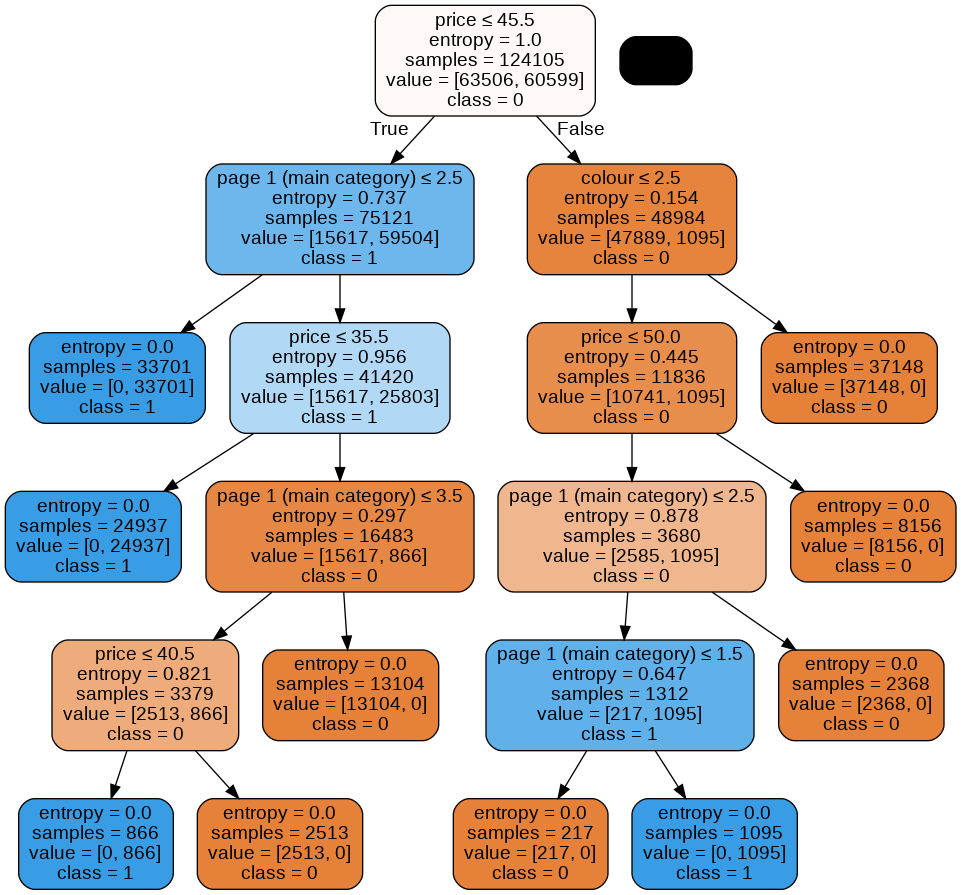

In [98]:
feature_names = list(DTx_train.columns)
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit_tree.png')
Image(graph.create_png())

In [99]:
feature_names = list(DTx_train.columns)

importances = classifier.feature_importances_ ## most important line in this cell

#sort them
indices = np.argsort(importances)[::-1] 
for f in range(DTx_train.shape[1]):
    print(f'{f+1} feature {feature_names[indices[f]]} {importances[indices[f]]}')

1 feature price 0.8109063166888519
2 feature page 1 (main category) 0.17054200401295178
3 feature colour 0.018551679298196247
4 feature page 0.0
5 feature model photography 0.0
6 feature location 0.0
7 feature session ID 0.0
8 feature country 0.0
9 feature order 0.0
10 feature day 0.0
11 feature month 0.0
12 feature year 0.0


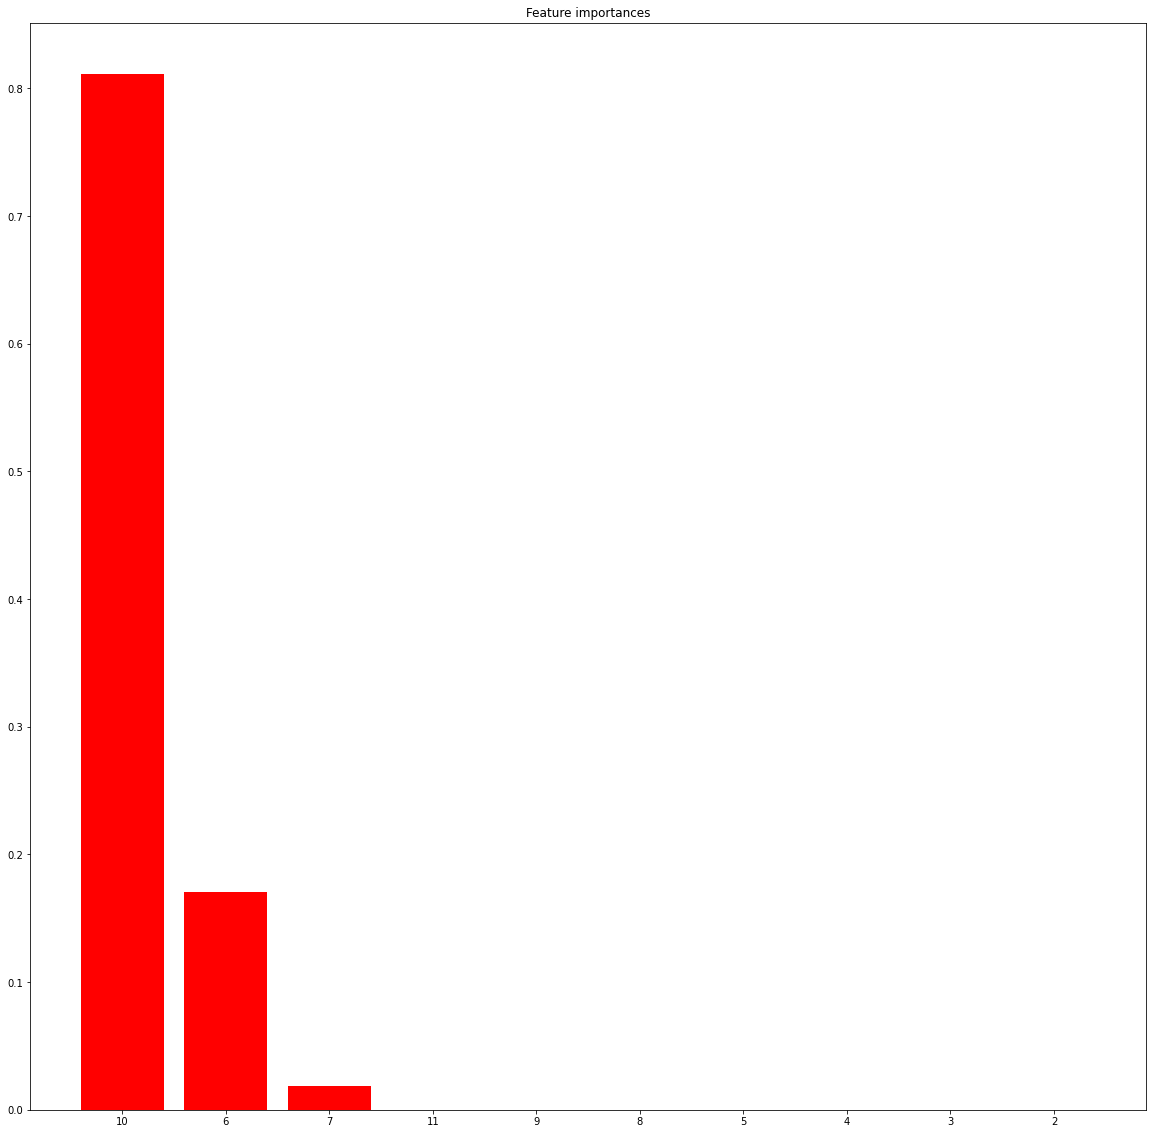

In [100]:
plt.figure(figsize=(20, 20))
plt.title("Feature importances")
plt.bar(range(DTx_train.shape[1])[0:10], importances[indices][0:10],
        color="r", align="center")
plt.xticks(range(DTx_train.shape[1])[0:10], indices[0:10]) #replace the ticks (1st input) by the indicies values
plt.show()

In [101]:
classifier = tree.DecisionTreeClassifier()

print("Start fitting the data")

hp = {"criterion":['gini','entropy'], 'max_depth':np.arange(3,9)}

for cv in tqdm(range(3,6)):
    grid = GridSearchCV(classifier, param_grid  = hp  , cv = cv)
    grid.fit(DTx_train,DTy_train)
    print(f"score for {cv} fold CV is : {grid.score(DTx_test,DTy_test)}")
    print(f"Best result {grid.best_params_}")

Start fitting the data


  0%|          | 0/3 [00:00<?, ?it/s]

score for 3 fold CV is : 1.0
Best result {'criterion': 'gini', 'max_depth': 5}
score for 4 fold CV is : 1.0
Best result {'criterion': 'gini', 'max_depth': 5}
score for 5 fold CV is : 1.0
Best result {'criterion': 'gini', 'max_depth': 5}


## Pruning

In [102]:
clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth)
path = clf.cost_complexity_pruning_path(X_train, y_train) ## Pruning !

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

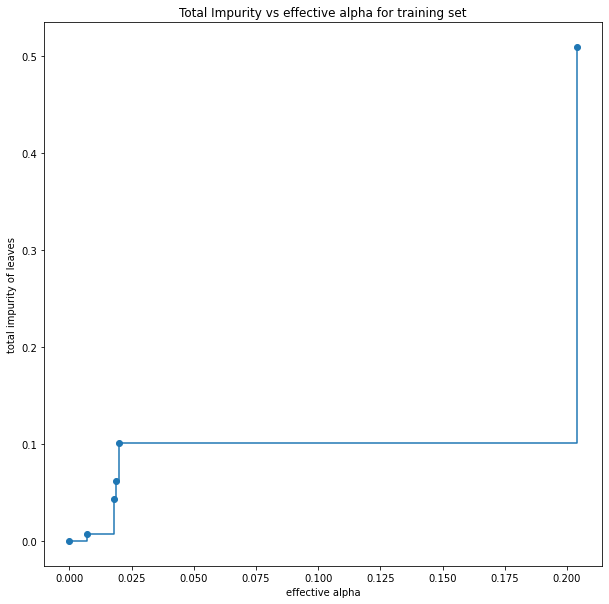

In [103]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities ## Alpha we have been talking about
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [104]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.49005484363528096


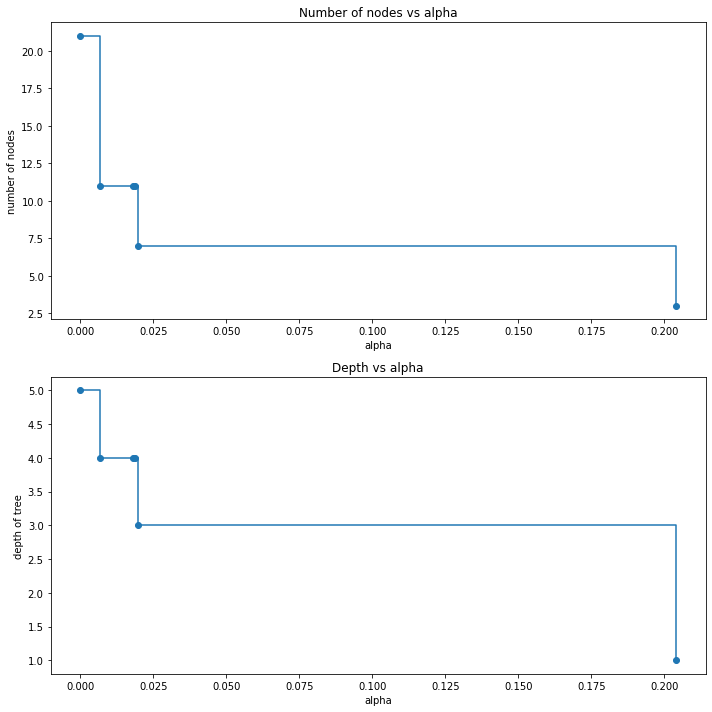

In [105]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1,figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

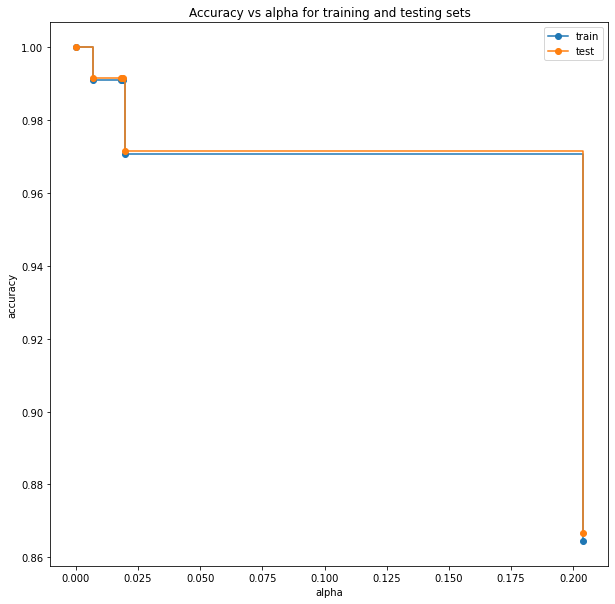

In [106]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [107]:
#another implementation of DT
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [2,3,4,5,10,15,20,25]},
              {'min_samples_leaf': [2,5,10,15,20,25]}]
dtree = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

dtree.fit(DTx_train,DTy_train)
predictions = dtree.predict(DTx_test)
acc = accuracy_score(DTy_test, predictions)
dtree_score=np.round(acc*100,2)
dtree_score

100.0